In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from matplotlib.patches import Wedge
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [2]:
plt.rc('font',family='Arial') 

In [19]:
#Load metadata  
metadata=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Table S2.csv")

In [20]:
metadata

,SampleID,SequenceID,People,Culture,DNA concentration,Library concentration,Raw Reads Count,Clean Reads Count,Clean reads/ Raw reads,contig count,contig_max_Length,contig_N50,contig_N90,contig_total_Length,MAG count,HMQ MAGs Count,Number of Species identified by contigs
0,P_1_faeces_aerobic_12h,V350037516_L01_4,P1,aerobic-12h,22.600,4.14,22775473,20612367,0.905025,1197,2228967,95186,9650,28093561,14,7,82
1,P_1_faeces_aerobic_24h,V350037516_L01_8,P1,aerobic-24h,4.840,4.40,29965740,27530171,0.918722,3222,2595785,80338,5634,51433777,27,6,99
2,P_1_faeces_anaerobic_12h,V350037516_L01_3,P1,anaerobic-12h,14.900,3.24,25350414,23523032,0.927915,675,1055583,140648,17875,24127770,13,5,49
3,P_1_faeces_anaerobic_24h,V350037516_L01_7,P1,anaerobic-24h,7.060,4.06,31819947,29172018,0.916784,3269,1181998,49932,6274,51435458,28,7,108
4,P_1_faeces_mrs_12h,V350037516_L01_5,P1,mrs-12h,0.854,2.60,24443859,21110556,0.863634,3972,854879,29594,3302,38044251,23,6,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,P_13_faeces_anaerobic_12h,V350029872_L04_9,P13,anaerobic-12h,61.800,8.88,6565918,6145584,0.935982,1376,390261,40624,3960,15500042,9,2,43
87,P_13_faeces_anaerobic_24h,V350029872_L04_12,P13,anaerobic-24h,93.400,8.94,54129547,24889505,0.459814,4676,2298458,44461,3836,52135600,20,7,126
88,P_13_faeces_mrs_12h,V350029872_L04_11,P13,mrs-12h,3.620,1.61,1914696,1571335,0.820671,404,123889,35292,7432,6169190,6,1,31
89,P_13_faeces_mrs_24h,V350029872_L04_15,P13,mrs-24h,21.000,4.78,14858775,13242346,0.891214,1020,414369,35143,4570,12342611,6,1,59


In [4]:
metadata

,People,Culture_type,ID,Detail,merge_culture_type
0,P1,aerobic-12h,V350037516_L01_4,P_01_faeces_aerobic-12h,aerobic
1,P2,aerobic-12h,V350037516_L01_12,P_02_faeces_aerobic-12h,aerobic
2,P3,aerobic-12h,V350037516_L02_1,P_03_faeces_aerobic-12h,aerobic
3,P4,aerobic-12h,V350037516_L02_10,P_04_faeces_aerobic-12h,aerobic
4,P5,aerobic-12h,V350037516_L02_20,P_05_faeces_aerobic-12h,aerobic
...,...,...,...,...,...
86,P9,unculture,V350029872_L02_11,P_09_faeces_unculture,unculture
87,P6,unculture,V350029872_L03_1,P_06_faeces_unculture,unculture
88,P8,unculture,V350029872_L03_10,P_08_faeces_unculture,unculture
89,P12,unculture,V350029872_L03_20,P_12_faeces_unculture,unculture


In [21]:
#Load the data contained speciesID, total length and SequenceID
sam_with_lev=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Total contig length sample speices.tsv",sep="\t")

In [22]:
sam_with_lev["taxid"]=sam_with_lev["taxid"].astype("str")

In [23]:
sp_725_name=sam_with_lev["taxid"].unique().astype("str").tolist()

In [8]:
def add2_725sp(T,P,sp_name):
    import pandas as pd
    ID_=metadata[(metadata.People==P) & (metadata.Culture_type==T)]["ID"].tolist()[0]
    x=sam_with_lev[sam_with_lev["Sample_ID"]==ID_].groupby("taxid").sum()["length"]
    y=[]
    z=[]
    for i in sp_name:
        z.append(i)
        if i in x.index:
            y.append(x[i])
        else:
            y.append(0)
    r=pd.DataFrame([z,y],index=["SP_name","contig_sum_len"]).T
    r["Type"]=T
    r["People"]=P
    r.index=r["SP_name"]

    return r

In [9]:
def get_sp_name(P):
    import pandas as pd
    ID_=metadata[(metadata.People==P)]["ID"].tolist()[0]
    x=sam_with_lev[sam_with_lev["Sample_ID"]==ID_].groupby("Species").sum()["length"]
    return x.index.tolist()

In [10]:
def tr_zero(x):
    if x==0:
        return np.nan
    else:
        return x

In [27]:
## Fig2A

In [24]:
def add_sp_type(T,sp_name):
    '''
    Enter the culture type, and the ID of the species, and return a Dataframe with two columns, the first column for culture type and the second column for total contig length
    '''
    import pandas as pd
    ID_=metadata[metadata.Culture==T]["SequenceID"].tolist()
    x=sam_with_lev[sam_with_lev["Sample_ID"].isin(ID_)].groupby("taxid").sum()["length"]
    y=[]
    z=[]
    for i in sp_name:
        z.append(i)
        if i in x.index:
            y.append(x[i])
        else:
            y.append(0)
    r=pd.DataFrame([z,y],index=["SP_name","contig_sum_len"]).T
    r["Type"]=T
    r.index=r["SP_name"]
    return r

In [25]:
def log_sp_cMECOS():
    """
    Running this function returns the log10 of the CG group (all culture conditions combined),UG group, and cMECOS considering the total contig length
    """
    x=add_sp_type("unculture",sp_725_name).sort_values("contig_sum_len",ascending=False)["SP_name"]
    y=(add_sp_type("unculture",sp_725_name).sort_values("contig_sum_len",ascending=False)["contig_sum_len"]+1)
    
    y_a12=(add_sp_type("aerobic-12h",sp_725_name,).loc[x]["contig_sum_len"]+1)
    y_a24=(add_sp_type("aerobic-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_ana12=(add_sp_type("anaerobic-12h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_ana24=(add_sp_type("anaerobic-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_mrs12=(add_sp_type("mrs-12h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_mrs24=(add_sp_type("mrs-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    z1=pd.concat([y_a12,y_a24,y_ana12,y_ana24,y_mrs12,y_mrs24],axis=1).sum(axis=1).map(np.log10).fillna(0)
    z2=pd.concat([y],axis=1).sum(axis=1).map(np.log10).fillna(0)
    z3=pd.concat([y_a12,y_a24,y_ana12,y_ana24,y_mrs12,y_mrs24,y],axis=1).sum(axis=1).map(np.log10).fillna(0)
    DDD=pd.concat([z1,z2,z3],axis=1)
    DDD.columns=["CG","UG","cMECOS"]
    return DDD

In [26]:
def logFC_all_people_cg_vs_ug():
    """
    Running this function returns logFC of the total contig length added to the CG group (all culture conditions together) compared to the UG group
    """
    x=add_sp_type("unculture",sp_725_name).sort_values("contig_sum_len",ascending=False)["SP_name"]
    y=(add_sp_type("unculture",sp_725_name).sort_values("contig_sum_len",ascending=False)["contig_sum_len"]+1)
    
    y_a12=(add_sp_type("aerobic-12h",sp_725_name,).loc[x]["contig_sum_len"]+1)
    y_a24=(add_sp_type("aerobic-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_ana12=(add_sp_type("anaerobic-12h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_ana24=(add_sp_type("anaerobic-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_mrs12=(add_sp_type("mrs-12h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_mrs24=(add_sp_type("mrs-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    z=pd.concat([y_a12,y_a24,y_ana12,y_ana24,y_mrs12,y_mrs24],axis=1).sum(axis=1).map(np.log10).fillna(0)-y.map(np.log10).fillna(0)
    return z

In [27]:
FC_PLOT2=pd.DataFrame(logFC_all_people_cg_vs_ug())
FC_PLOT2.columns=["value"]

In [28]:
FC_PLOT2["variable"]=FC_PLOT2.index

In [29]:
up_sor_index=FC_PLOT2[FC_PLOT2["value"]>0].sort_values("value",ascending=False).index

In [30]:
down_sor_index=FC_PLOT2[FC_PLOT2["value"]<0].sort_values("value",ascending=False).index

In [31]:
sort_plot_index=up_sor_index.tolist()+down_sor_index.tolist()

In [32]:
FC_PLOT2=FC_PLOT2.loc[sort_plot_index]

In [33]:
data_PLOT3=log_sp_cMECOS().loc[sort_plot_index]

In [34]:
up_index=data_PLOT3[data_PLOT3["UG"]<=0].sort_values("CG",ascending=False).index

In [35]:
ttt=data_PLOT3[data_PLOT3["CG"]-data_PLOT3["UG"]<0]

In [36]:
ttt["lgFC"]=ttt["CG"]-ttt["UG"]

<ipython-input-36-b305816003b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttt["lgFC"]=ttt["CG"]-ttt["UG"]


In [37]:
down_index=ttt.sort_values("lgFC",ascending=False).index

In [38]:
mid_index=FC_PLOT2.loc[list(set(data_PLOT3.index.tolist())-set(up_index.tolist())-set(down_index.tolist()))].sort_values("value",ascending=False).index

In [39]:
all_index=up_index.to_list()+mid_index.to_list()+down_index.to_list()

In [40]:
data_PLOT4=data_PLOT3.loc[all_index]

In [41]:
up_index_FC=[i for i in all_index if i in FC_PLOT2[FC_PLOT2["value"]>0].index]

In [42]:
down_index_FC=[i for i in all_index if i in FC_PLOT2[FC_PLOT2["value"]<0].index]

In [43]:
len(up_index_FC+down_index_FC)

725

In [44]:
725-len(down_index)

653

In [45]:
data_PLOT4.index=data_PLOT4.index.astype("str")

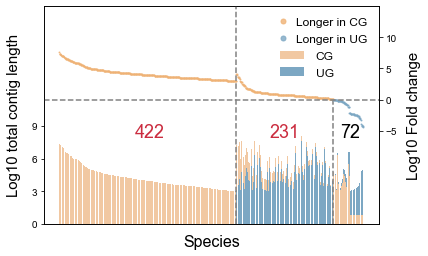

In [46]:
fig=plt.figure(figsize=[6,4])
ax=fig.add_subplot()

ax.bar(data_PLOT4.index,data_PLOT4["CG"],label="CG",color="#f1c8a2")
ax.bar(data_PLOT4.index,data_PLOT4["UG"],label="UG",alpha=1,color="#7ca7c3")
ax.bar(data_PLOT4.loc[down_index].index,data_PLOT4.loc[down_index]["CG"],color="#f1c8a2")
plt.text(180,8,422,size=18,color="#cb2d40")
plt.text(500,8,231,size=18,color="#cb2d40")
plt.text(670,8,72,size=18)

plt.ylim([0,20])
ax2=ax.twinx()
ax2.plot(FC_PLOT2.loc[up_index_FC]["variable"],FC_PLOT2.loc[up_index_FC]["value"],"o",markersize=1,alpha=0.8,label="Longer in CG",color="#efb275")
ax2.plot(FC_PLOT2.loc[down_index_FC]["variable"],FC_PLOT2.loc[down_index_FC]["value"],"o",markersize=1,alpha=0.8,label="Longer in UG",color="#7ca7c3")
plt.ylim([-20,15])
ax.set_xticks([])
ax.set_ylabel("Log10 total contig length",size=15,labelpad=10)
ax2.set_ylabel("Log10 Fold change",size=15,labelpad=10)
ax.set_xlabel("Species",size=16,labelpad=10)
plt.axhline(0,ls="--",color="grey")
plt.axvline(422,ls="--",color="grey")
plt.vlines(653,ymax=0,ymin=-20,ls="--",color="grey")
ax.set_yticks([0,3,6,9])
ax2.set_yticks([-5,0,5,10])
ax2.legend(frameon=False,fontsize=12,handletextpad=0.1,markerscale=5)
ax.legend(frameon=False,fontsize=12,loc=[0.69,0.65],handletextpad=1)

# fig.savefig("725总长_CGvsUG.pdf")

In [ ]:
# Fig2B

In [49]:
#Load the Speceies ID to tax level
SPID2lev=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\taxID2nam.txt",sep=";",index_col=0)

In [52]:
up_mid_SP=SPID2lev.loc[[int(i) for i in mid_index.to_list()+up_index.to_list()]]

In [53]:
PHY_BAC=up_mid_SP[up_mid_SP["Kingdom"]=='Bacteria'].groupby("Phylum").count().sort_values("Species",ascending=False)["Species"]

In [54]:
FAM_VIR=up_mid_SP[up_mid_SP["Kingdom"]=='Viruses'].groupby("Family").count().sort_values("Species",ascending=False)["Species"]

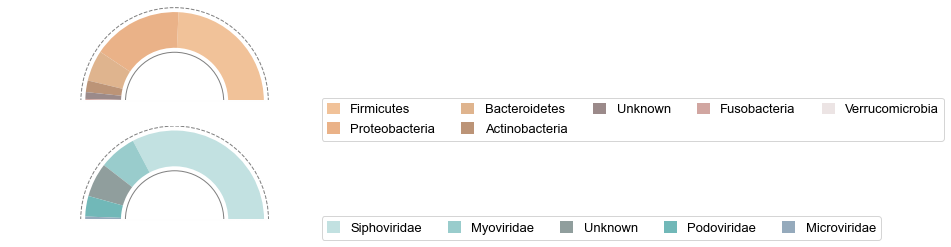

In [56]:
fig=plt.figure()
ax=fig.add_subplot(211)
#Bacteria
data=[i/(PHY_BAC.sum()*2) for i in PHY_BAC]
series = pd.Series(data)
label = PHY_BAC.index.tolist()
colors = ["#f1c299","#eab288","#dfb48e","#bc9477","#9b8a8a","#d1a6a1","#ece4e4"]
patches,l_text =plt.pie(series, colors = colors,
                wedgeprops = dict(width = 0.4),
                startangle = 0,
                textprops = dict(fontsize = 15),
                normalize=False
                     )

semicircle=Wedge((0,0),1.05,0,180, edgecolor = 'grey', facecolor = 'None', linestyle='--')
ax.add_artist(semicircle)  
plt.axis('equal') 
semicircle=Wedge((0,0),0.55,0,180, edgecolor = 'grey', facecolor = 'None', linestyle='-')
ax.add_artist(semicircle) 
plt.axis('equal')
x = [-1.05,1.05]
y = [0,0]
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)

plt.legend(patches, label, loc=0, ncol = 5, fontsize = 13, bbox_to_anchor=(0.92, 0.15),handlelength=1, handleheight=1)

#Viruses
data=[i/(FAM_VIR.sum()*2) for i in FAM_VIR]
series = pd.Series(data)
label = FAM_VIR.index.tolist()
colors =["#c2e1e1","#99cccc","#909e9d","#71b8b8","#95aabc"]
ax =fig.add_subplot(212)
patches,l_text =plt.pie(series, colors = colors,
                wedgeprops = dict(width = 0.4),
                startangle = 0,
                textprops = dict(fontsize = 15),
                normalize=False
                     )
semicircle=Wedge((0,0),1.05,0,180, edgecolor = 'grey', facecolor = 'None', linestyle='--')
ax.add_artist(semicircle) 
plt.axis('equal') 
semicircle=Wedge((0,0),0.55,0,180, edgecolor = 'grey', facecolor = 'None', linestyle='-')
ax.add_artist(semicircle) 
plt.axis('equal')
x = [-1.05,1.05]
y = [0,0]
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)

plt.legend(patches, label, loc=0, ncol = 5, fontsize = 13, bbox_to_anchor=(0.92, 0.15),handlelength=1, handleheight=1)


In [ ]:
#Fig 2C

In [57]:
data_PLOT4.index=data_PLOT4.index.astype(int)

In [58]:
for_box_plot_data=pd.merge(data_PLOT4,SPID2lev,left_index=True,right_index=True)

In [59]:
box_plot_bac=for_box_plot_data[for_box_plot_data["Kingdom"]=="Bacteria"][["UG","cMECOS","Phylum"]].melt("Phylum")

In [60]:
box_plot_bac=box_plot_bac[box_plot_bac["Phylum"]!="Unknown"]

In [61]:
box_plot_vir=for_box_plot_data[for_box_plot_data["Kingdom"]=="Viruses"][["UG","cMECOS","Family"]].melt("Family")

In [62]:
box_plot_vir=box_plot_vir[box_plot_vir["Family"]!="Unknown"]

In [63]:
# Count the original total contig length in two groups

In [64]:
add_origin_num_bac=box_plot_bac.copy()

In [65]:
add_origin_num_bac["origin"]=[10**i -1 for i in box_plot_bac.value]

In [66]:
add_origin_num_vir=box_plot_vir.copy()

In [67]:
add_origin_num_vir["origin"]=[10**i -1 for i in box_plot_vir.value]

In [68]:
add_origin_num_bac.groupby("variable").mean()

,value,origin
variable,,
UG,1.955157,4.157961e+05
cMECOS,4.826614,3.853577e+06


In [69]:
add_origin_num_vir.groupby("variable").mean()

,value,origin
variable,,
UG,1.383494,72792.655556
cMECOS,3.956403,223905.400000


In [70]:
## Only the top five data, bacteria and viruses are the top five; Viruses are the same as the last five

In [71]:
box_plot_bac=box_plot_bac[box_plot_bac.Phylum.isin(["Firmicutes","Bacteroidetes","Actinobacteria","Proteobacteria","Fusobacteria"])]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Bacteroidetes_UG v.s. Bacteroidetes_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.437e-02 U_stat=2.433e+03
Firmicutes_UG v.s. Firmicutes_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.974e-35 U_stat=1.928e+04
Actinobacteria_UG v.s. Actinobacteria_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.097e-03 U_stat=1.380e+02
Proteobacteria_UG v.s. Proteobacteria_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.232e-60 U_stat=1.236e+03
Fusobacteria_UG v.s. Fusobacteria_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.054e-01 U_stat=0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p

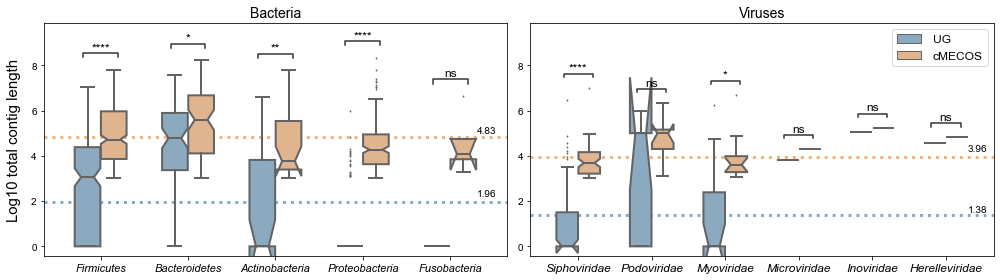

In [72]:
fig=plt.figure(figsize=[14,4])
ax=fig.add_subplot(121)
plt.axhline(box_plot_bac[box_plot_bac["variable"]=="cMECOS"].mean().tolist()[0],ls=":",linewidth=3,color="#edb380",zorder=-1)
plt.axhline(box_plot_bac[box_plot_bac["variable"]=="UG"].mean().tolist()[0],ls=":",linewidth=3,color="#84acc7",zorder=-1)
v1=sns.boxplot(x="Phylum",y="value",hue="variable",order=["Firmicutes","Bacteroidetes","Actinobacteria","Proteobacteria","Fusobacteria"],palette=["#84acc7","#edb380"] ,linewidth=2,notch=True,data=box_plot_bac,fliersize=1,width=0.6,ax=ax)
add_stat_annotation(v1,data=box_plot_bac,x="Phylum",y="value",order=["Firmicutes","Bacteroidetes","Actinobacteria","Proteobacteria","Fusobacteria"],hue="variable",
                    box_pairs=[ (("Firmicutes", "UG"),("Firmicutes", "cMECOS")),
                               (("Proteobacteria", "UG"),("Proteobacteria", "cMECOS")),
                               (("Fusobacteria", "UG"),("Fusobacteria", "cMECOS")),
                              (("Actinobacteria", "UG"),("Actinobacteria", "cMECOS")),
                              (("Bacteroidetes", "UG"),("Bacteroidetes", "cMECOS"))
                              ],test="Mann-Whitney",text_format='star', loc='inside',fontsize=12)
ax.set_ylabel("Log10 total contig length",size=15,labelpad=10)
ax.set_xlabel("",size=15,labelpad=10)
ax.get_legend().remove()
plt.xticks(size=11,style="italic")

plt.text(4.3,5,4.83)
plt.text(4.3,2.2,1.96)


ax2=fig.add_subplot(122)
plt.axhline(box_plot_vir[box_plot_vir["variable"]=="cMECOS"].mean().tolist()[0],ls=":",linewidth=3,color="#edb380",zorder=-1)
plt.axhline(box_plot_vir[box_plot_vir["variable"]=="UG"].mean().tolist()[0],ls=":",linewidth=3,color="#84acc7",zorder=-1)
v2=sns.boxplot(x="Family",y="value",order=["Siphoviridae","Podoviridae","Myoviridae","Microviridae","Inoviridae","Herelleviridae"],hue="variable",palette=["#84acc7","#edb380"] ,linewidth=2,notch=True,data=box_plot_vir,fliersize=1,width=0.6,ax=ax2)
add_stat_annotation(v2,data=box_plot_vir,x="Family",y="value",order=["Siphoviridae","Podoviridae","Myoviridae","Microviridae","Inoviridae","Herelleviridae"],hue="variable",
                    box_pairs=[ (("Siphoviridae", "UG"),("Siphoviridae", "cMECOS")),
                               (("Myoviridae", "UG"),("Myoviridae", "cMECOS")),
                               (("Podoviridae", "UG"),("Podoviridae", "cMECOS")),
                              (("Microviridae", "UG"),("Microviridae", "cMECOS")),
                              (("Herelleviridae", "UG"),("Herelleviridae", "cMECOS")),
                              (("Inoviridae", "UG"),("Inoviridae", "cMECOS"))],test="Mann-Whitney",text_format='star', loc='inside',fontsize=12)
ax2.set_ylabel("",size=15,labelpad=10)
ax2.set_xlabel("",size=15,labelpad=10)
ax2.legend(shadow=False,fontsize=12,handletextpad=1)
plt.xticks(size=12,style="italic")

plt.text(5.3,4.2,3.96)
plt.text(5.3,1.5,1.38)
ax2.set_yticks([0,2,4,6,8])
ax2.set_ylim(ax.get_ylim())
ax.set_title("Bacteria",size=14)
ax2.set_title("Viruses",size=14)
fig.tight_layout()
# fig.savefig("BACandVIR_total_contig_len_inUGandcMECOS.pdf")

In [73]:
#Load N50 

In [79]:
UG_N50=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\UG_all_people_contigs_bySP_stat.csv")

In [80]:
cMECOS_N50=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\cMECOS_all_people_contigs_bySP_stat.csv")

In [75]:
sam_with_lev

,taxid,length,Sample_ID
0,1042156,11350,V350029872_L01_1
1,105841,57226,V350029872_L01_1
2,116085,70208,V350029872_L01_1
3,1229621,2092,V350029872_L01_1
4,1297617,4580,V350029872_L01_1
...,...,...,...
9199,820,332250,V350037516_L02_9
9200,821,3564759,V350037516_L02_9
9201,823,3670974,V350037516_L02_9
9202,84030,7338,V350037516_L02_9


In [81]:
cMECOS_N50_with_lev=pd.merge(cMECOS_N50,SPID2lev,left_on="taxid",right_index=True)
cMECOS_N50_with_lev_BAC=cMECOS_N50_with_lev[cMECOS_N50_with_lev["Kingdom"]=="Bacteria"]
cMECOS_N50_with_lev_VIR=cMECOS_N50_with_lev[cMECOS_N50_with_lev["Kingdom"]=="Viruses"]
UG_N50_with_lev=pd.merge(UG_N50,SPID2lev,left_on="taxid",right_index=True)
UG_N50_with_lev_BAC=UG_N50_with_lev[UG_N50_with_lev["Kingdom"]=="Bacteria"]
UG_N50_with_lev_VIR=UG_N50_with_lev[UG_N50_with_lev["Kingdom"]=="Viruses"]

In [82]:
cMECOS_N50_with_lev_BAC["Type"]="cMECOS"

UG_N50_with_lev_BAC["Type"]="UG"

<ipython-input-82-7e44cac5f83b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cMECOS_N50_with_lev_BAC["Type"]="cMECOS"
<ipython-input-82-7e44cac5f83b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UG_N50_with_lev_BAC["Type"]="UG"


In [83]:
UGandcMECOS_BAC_for_plot=pd.concat([UG_N50_with_lev_BAC,cMECOS_N50_with_lev_BAC])

UGandcMECOS_BAC_for_plot=UGandcMECOS_BAC_for_plot[UGandcMECOS_BAC_for_plot["Phylum"]!="Unknown"]

In [84]:
UGandcMECOS_BAC_for_plot["log10_N50"]=UGandcMECOS_BAC_for_plot["N50"].map(lambda x:np.log10(x+1))

In [ ]:
#Only remian the top 5

In [85]:
UGandcMECOS_BAC_for_plot=UGandcMECOS_BAC_for_plot[UGandcMECOS_BAC_for_plot["Phylum"].isin(["Firmicutes","Bacteroidetes","Actinobacteria","Proteobacteria","Fusobacteria"])]

D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


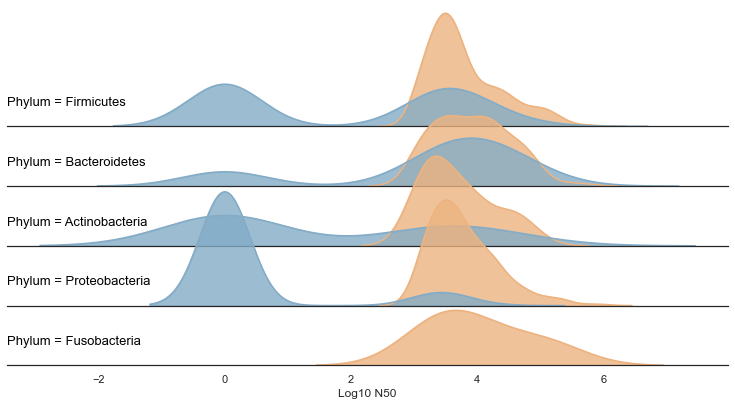

In [87]:
sns.set_theme(style="white",rc={"axes.facecolor":(0,0,0,0)})
g=sns.FacetGrid(UGandcMECOS_BAC_for_plot,row="Phylum",aspect=9,height=1.2)
g.map_dataframe(sns.kdeplot,x="log10_N50",hue="Type",fill=True,alpha=0.8,palette=["#84acc7","#edb380"])
g.map_dataframe(sns.kdeplot,x="log10_N50",hue="Type",color="black",palette=["#84acc7","#edb380"])

def ss_label(x,color):
    ax = plt.gca()
    ax.text(0, .2, ax.get_title(), color="black", fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(ss_label, "Phylum")
g.fig.subplots_adjust(hspace=-0.5)
g.set_titles("")

g.set(yticks=[],xlabel="Log10 N50")
g.despine(left=True)
# plt.savefig("BAC_kde.pdf")

In [88]:
cMECOS_N50_with_lev_VIR["Type"]="cMECOS"
UG_N50_with_lev_VIR["Type"]="UG"
UGandcMECOS_VIR_for_plot=pd.concat([UG_N50_with_lev_VIR,cMECOS_N50_with_lev_VIR])
UGandcMECOS_VIR_for_plot=UGandcMECOS_VIR_for_plot[UGandcMECOS_VIR_for_plot["Family"]!="Unknown"]
UGandcMECOS_VIR_for_plot["log10_N50"]=UGandcMECOS_VIR_for_plot["N50"].map(lambda x:np.log10(x+1))

<ipython-input-88-5eb65fc1ff5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cMECOS_N50_with_lev_VIR["Type"]="cMECOS"
<ipython-input-88-5eb65fc1ff5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UG_N50_with_lev_VIR["Type"]="UG"


D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density 

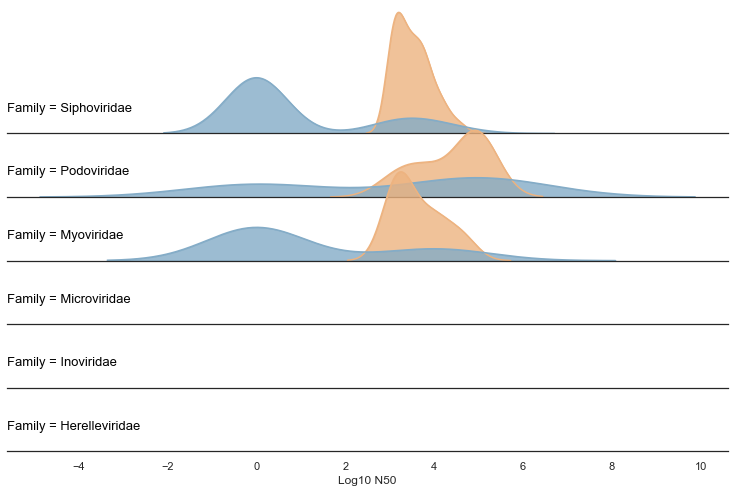

In [89]:
sns.set_theme(style="white",rc={"axes.facecolor":(0,0,0,0)})
g=sns.FacetGrid(UGandcMECOS_VIR_for_plot,row="Family",aspect=9,height=1.2)
g.map_dataframe(sns.kdeplot,x="log10_N50",hue="Type",fill=True,alpha=0.8,palette=["#84acc7","#edb380"])
g.map_dataframe(sns.kdeplot,x="log10_N50",hue="Type",color="black",palette=["#84acc7","#edb380"])
def ss_label(x,color):
    ax = plt.gca()
    ax.text(0, .2, ax.get_title(), color="black", fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(ss_label, "Phylum")
g.fig.subplots_adjust(hspace=-0.5)
g.set_titles("")

g.set(yticks=[],xlabel="Log10 N50")
g.despine(left=True)
# plt.savefig("Vir_kde.pdf")